In [1]:
pip install alpha_vantage pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Replace with your API key
api_key = "TH3OOWDCKKEJ51O5"

# Create a TimeSeries object
ts = TimeSeries(key=api_key, output_format="pandas")

# Get historical daily stock data for ADANI POWER (NSE: ADANIPOWER)
stock_symbol = "ADANIPOWER.BSE"  # BSE version (NSE is not directly supported)
data, meta_data = ts.get_daily(symbol=stock_symbol, outputsize="full")

# Print first few rows
print(data.head())

            1. open  2. high  3. low  4. close  5. volume
date                                                     
2025-02-25   471.90   514.75  466.15    497.70  2275913.0
2025-02-24   478.00   478.20  468.00    470.15   359854.0
2025-02-21   484.50   489.75  475.50    478.80   424238.0
2025-02-20   479.45   494.95  477.50    484.65   550009.0
2025-02-19   478.10   488.60  472.50    482.55   526461.0


In [3]:
adani_data=data

In [4]:
adani_data.head(10)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-02-25,471.90,514.75,466.15,497.70,2275913.0
2025-02-24,478.00,478.20,468.00,470.15,359854.0
2025-02-21,484.50,489.75,475.50,478.80,424238.0
2025-02-20,479.45,494.95,477.50,484.65,550009.0
2025-02-19,478.10,488.60,472.50,482.55,526461.0
2025-02-18,492.95,494.40,481.70,484.85,424055.0
2025-02-17,480.45,494.75,472.25,490.30,372170.0
2025-02-14,499.05,501.80,484.10,487.95,270507.0
2025-02-13,503.95,506.10,493.50,498.80,303906.0


In [5]:
adani_data.shape

(3832, 5)

In [6]:
adani_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,3832.000000,3832.000000,3832.000000,3832.000000,3.832000e+03
mean,128.795551,131.365632,126.117236,128.578549,1.366599e+06
std,162.158200,165.281453,158.871059,161.816312,5.857936e+06
min,15.650000,16.100000,15.200000,15.450000,0.000000e+00
25%,36.137500,36.750000,35.350000,36.050000,3.700922e+05
50%,57.700000,59.125000,56.000000,57.300000,7.265090e+05
75%,120.012500,122.300000,117.662500,120.075000,1.423387e+06
max,875.950000,896.750000,825.750000,875.000000,3.261489e+08


In [7]:
adani_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3832 entries, 2025-02-25 to 2009-08-20
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    3832 non-null   float64
 1   2. high    3832 non-null   float64
 2   3. low     3832 non-null   float64
 3   4. close   3832 non-null   float64
 4   5. volume  3832 non-null   float64
dtypes: float64(5)
memory usage: 179.6 KB


In [8]:
adani_data.isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Adani data')

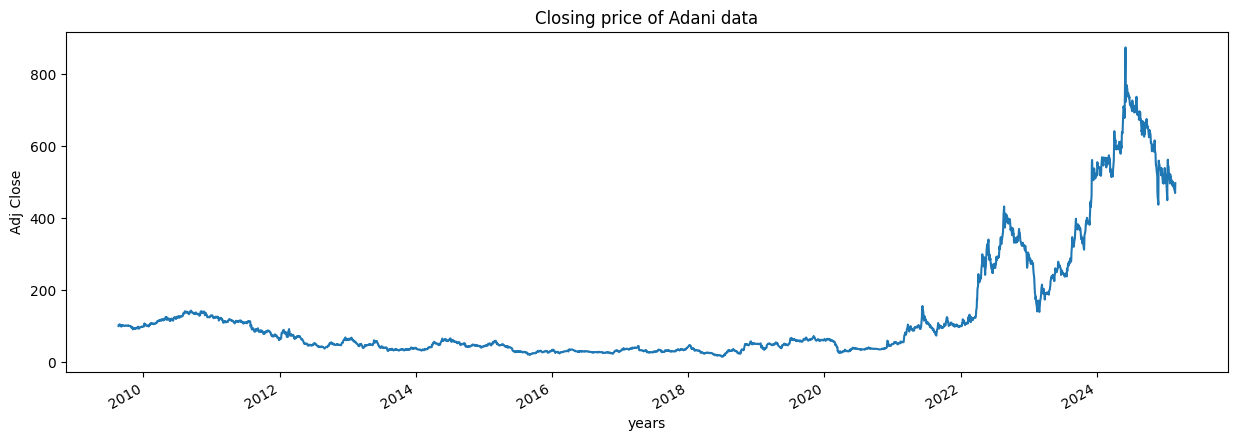

In [10]:
plt.figure(figsize = (15,5))
adani_data['4. close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Adani data")

In [11]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Adani data")

In [12]:
adani_data.columns


Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

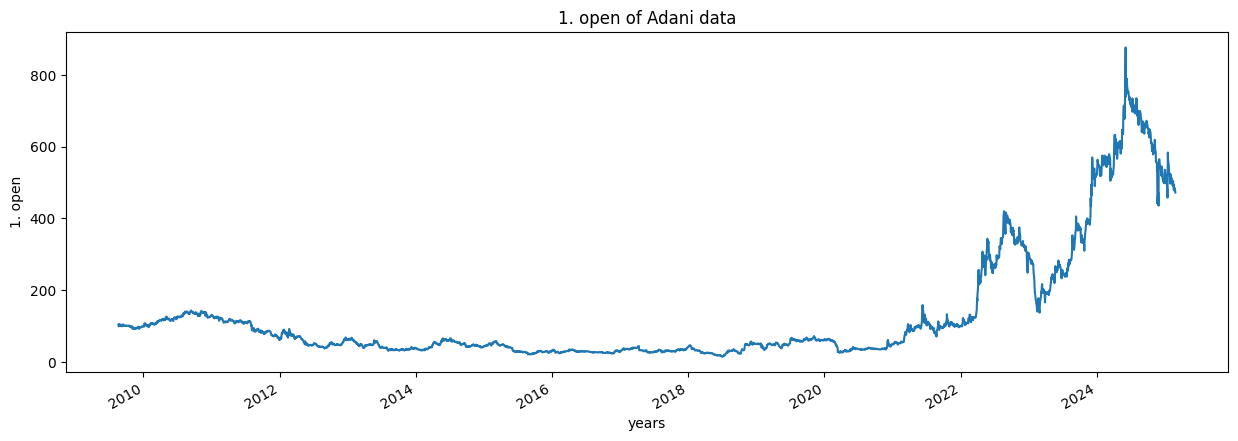

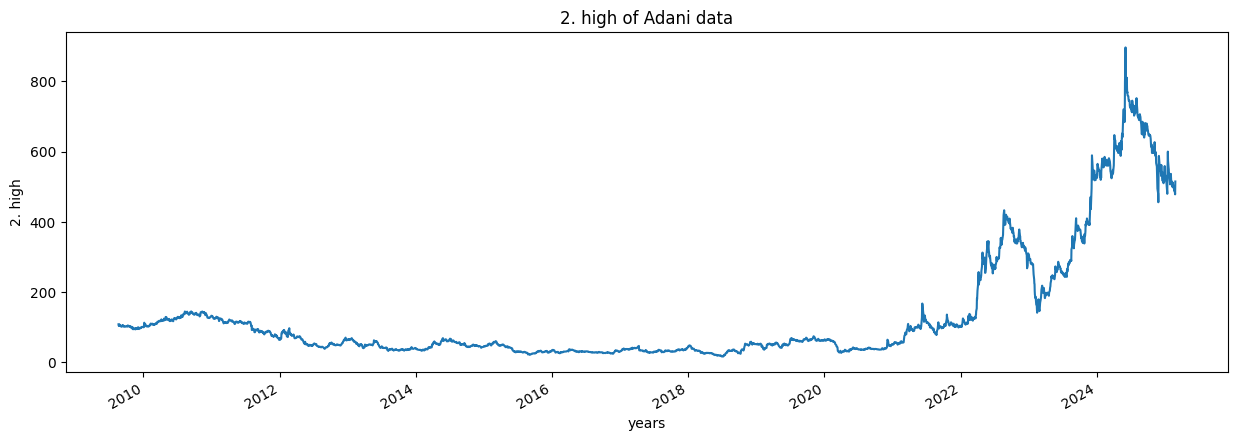

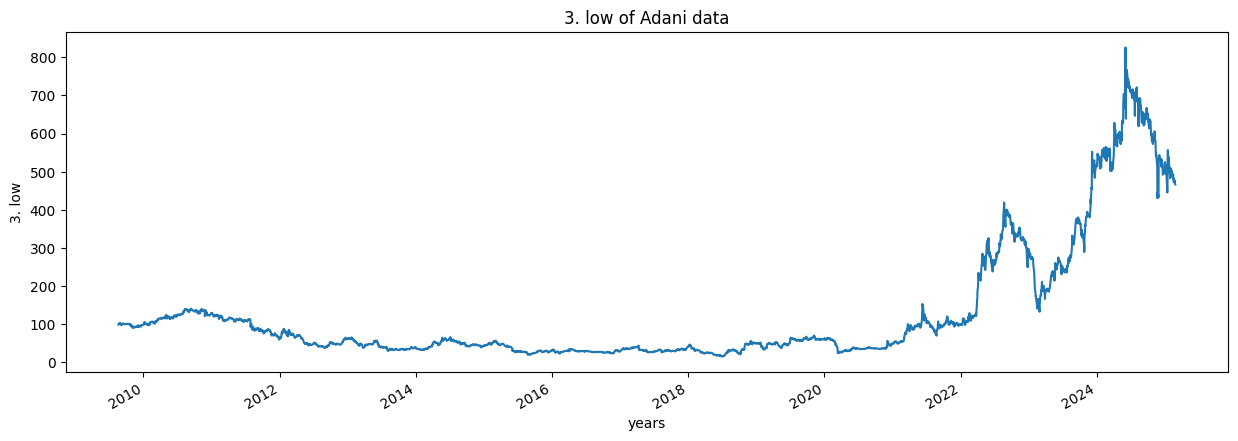

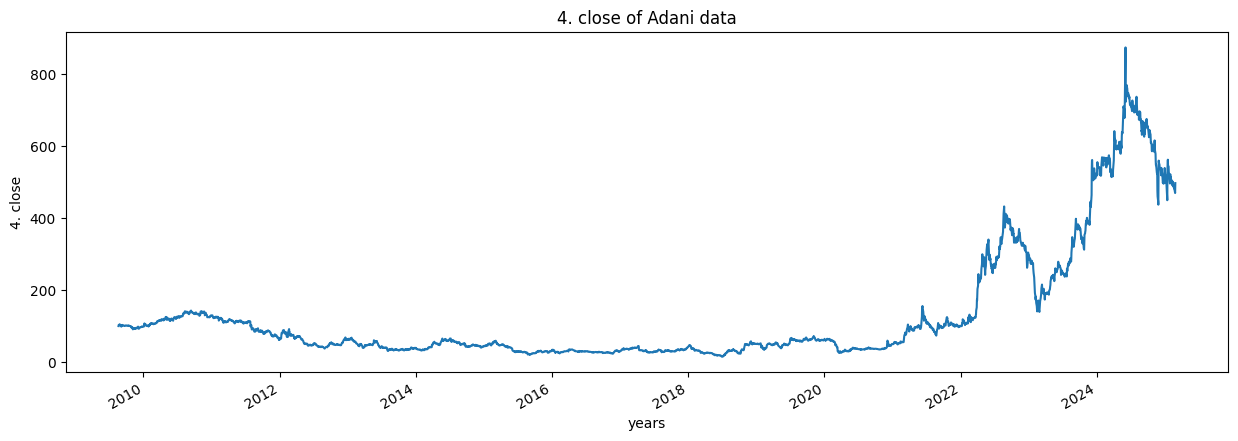

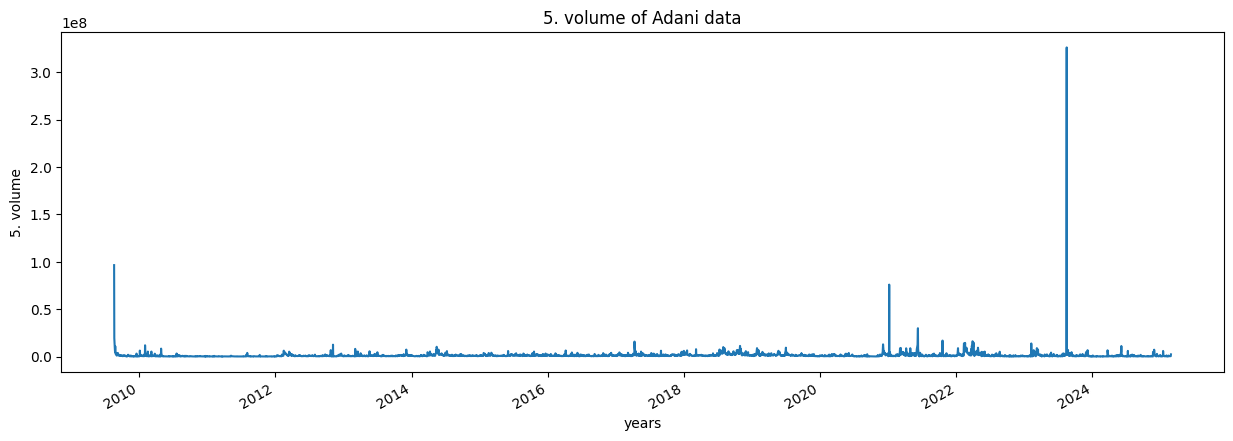

In [13]:
for column in adani_data.columns:
    plot_graph((15,5),adani_data[column], column)

In [14]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [15]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [16]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [17]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [18]:
for i in range(2004,2025):
    print(i,list(adani_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 88
2010 250
2011 246
2012 246
2013 248
2014 242
2015 246
2016 246
2017 247
2018 245
2019 244
2020 250
2021 248
2022 248
2023 247
2024 250


In [19]:
adani_data['MA_for_250_days'] = adani_data['4. close'].rolling(250).mean()

In [20]:
adani_data['MA_for_250_days'][0:250].tail()

date
2024-03-04         NaN
2024-03-01         NaN
2024-02-29         NaN
2024-02-28         NaN
2024-02-27    607.5564
Name: MA_for_250_days, dtype: float64

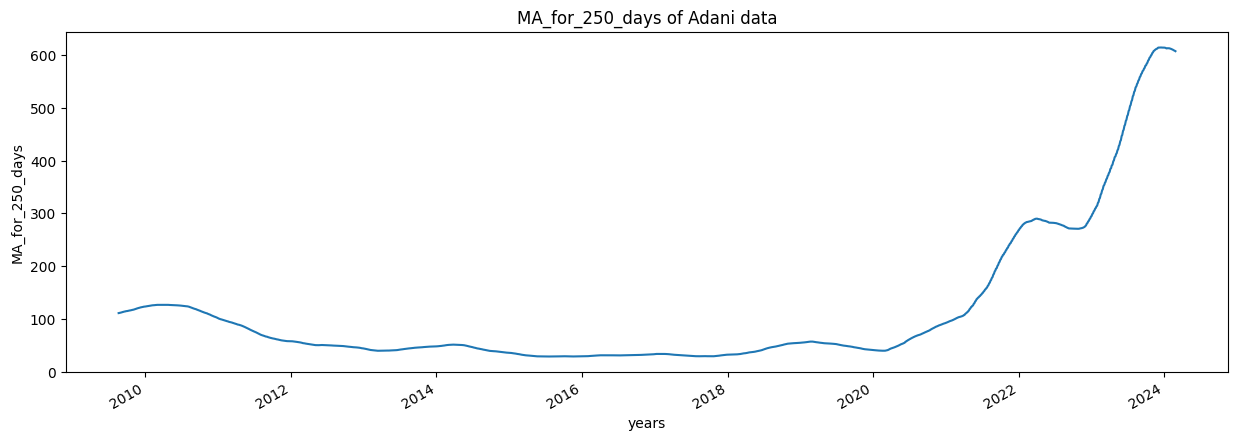

In [21]:
plot_graph((15,5), adani_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

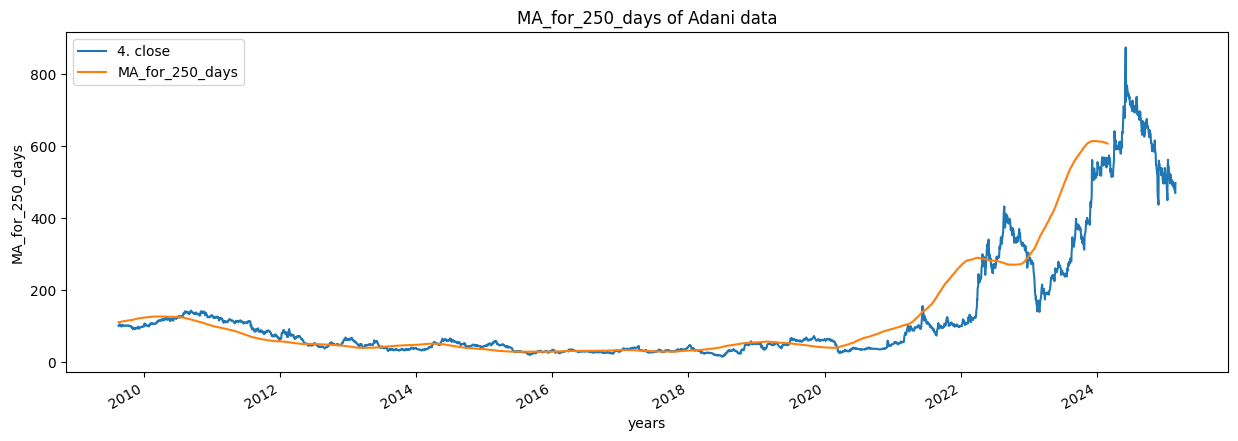

In [22]:
plot_graph((15,5), adani_data[['4. close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

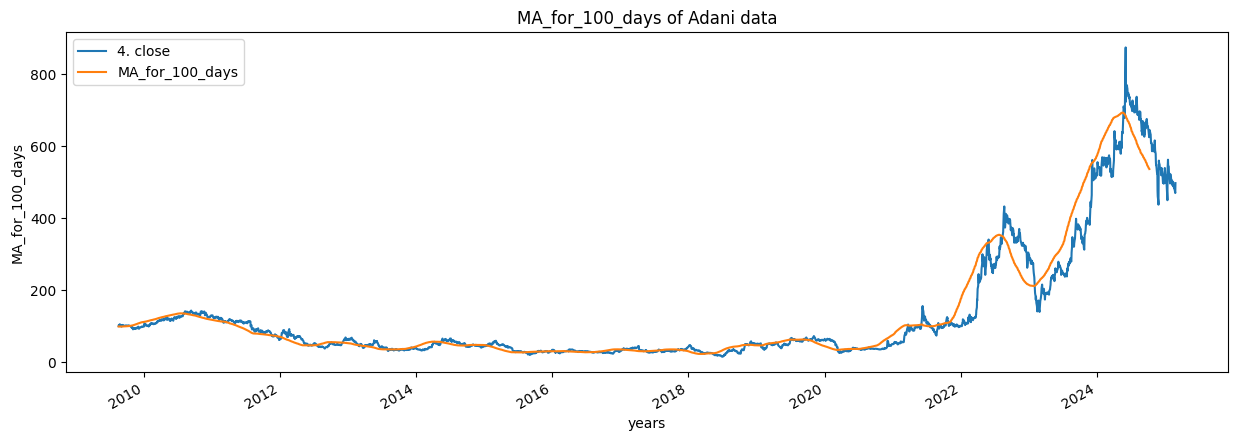

In [23]:
adani_data['MA_for_100_days'] = adani_data['4. close'].rolling(100).mean()
plot_graph((15,5), adani_data[['4. close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

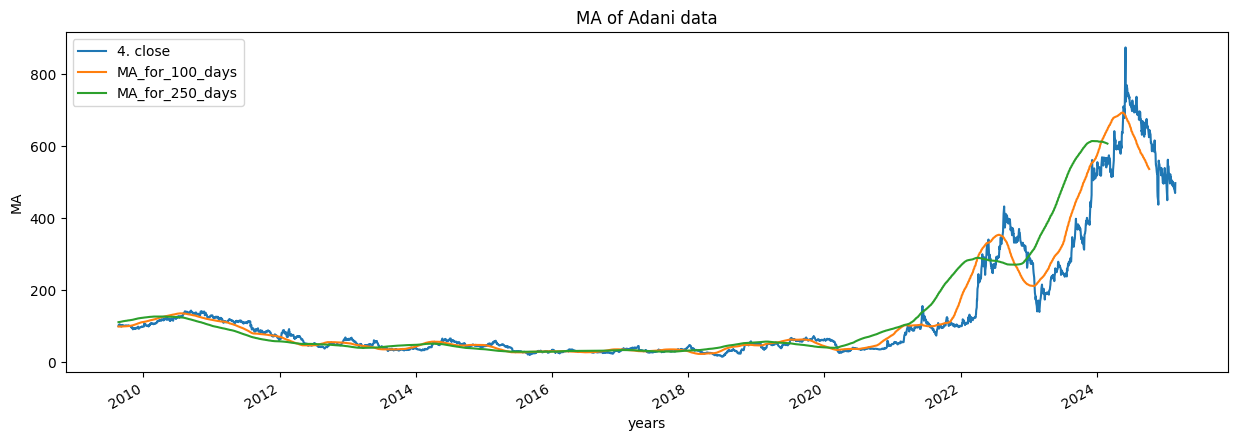

In [24]:
plot_graph((15,5), adani_data[['4. close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [25]:
adani_data['percentage_change_cp'] = adani_data['4. close'].pct_change()
adani_data[['4. close','percentage_change_cp']].head()

,4. close,percentage_change_cp
date,,
2025-02-25,497.70,NaN
2025-02-24,470.15,-0.055355
2025-02-21,478.80,0.018398
2025-02-20,484.65,0.012218
2025-02-19,482.55,-0.004333


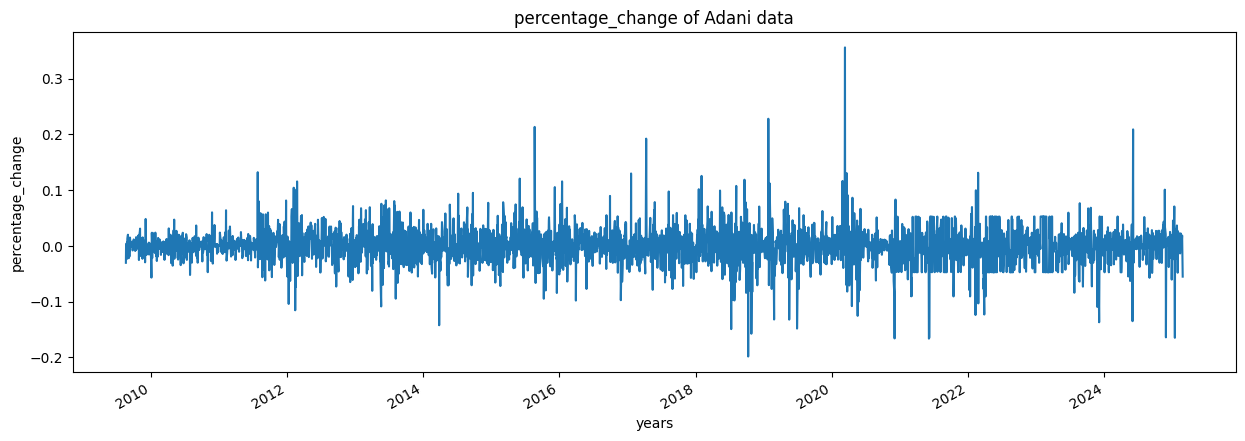

In [26]:
plot_graph((15,5), adani_data['percentage_change_cp'], 'percentage_change')

In [27]:
close_price = adani_data[['4. close']]

In [28]:
max(close_price.values),min(close_price.values) 

(array([875.]), array([15.45]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.56104939],
       [0.52899773],
       [0.53906114],
       ...,
       [0.10191379],
       [0.1020883 ],
       [0.09842359]])

In [30]:
len(scaled_data)

3832

In [31]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[0.56104939],
        [0.52899773],
        [0.53906114],
        [0.54586702],
        [0.54342388],
        [0.5460997 ],
        [0.55244023],
        [0.54970624],
        [0.56232913],
        [0.56558664],
        [0.56157292],
        [0.55360363],
        [0.55668664],
        [0.56791344],
        [0.56994939],
        [0.57134547],
        [0.56640102],
        [0.58024548],
        [0.57914025],
        [0.5741958 ],
        [0.58972718],
        [0.56035135],
        [0.56000233],
        [0.58105986],
        [0.58873829],
        [0.59310104],
        [0.59717294],
        [0.61497295],
        [0.61741609],
        [0.63672852],
        [0.6210808 ],
        [0.60927229],
        [0.50572974],
        [0.54266767],
        [0.56110756],
        [0.56884416],
        [0.57559188],
        [0.56134024],
        [0.58757489],
        [0.58897097],
        [0.59513699],
        [0.5976383 ],
        [0.60991216],
        [0.57181083],
        [0.57210168],
        [0

In [33]:
int(len(x_data)*0.7)

2612

In [34]:
4908-100-int(len(x_data)*0.7)

2196

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2612, 100, 1)
(2612, 1)
(1120, 100, 1)
(1120, 1)


In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [38]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\SHAUN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 49s 18ms/step - loss: 0.0022
Epoch 2/2
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - loss: 4.4155e-04


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [42]:
predictions = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [43]:
predictions

array([[0.05021136],
       [0.04992219],
       [0.04994477],
       ...,
       [0.12126318],
       [0.12074739],
       [0.12046097]], dtype=float32)

In [44]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 58.609173],
       [ 58.360615],
       [ 58.38002 ],
       ...,
       [119.68177 ],
       [119.23842 ],
       [118.99223 ]], dtype=float32)

In [45]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 35.9 ],
       [ 36.15],
       [ 35.4 ],
       ...,
       [103.05],
       [103.2 ],
       [100.05]])

In [46]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [47]:
rmse

np.float64(18.192809954236274)

In [48]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = adani_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
date,,
2014-02-28,35.90,58.609173
2014-02-26,36.15,58.360615
2014-02-25,35.40,58.380020
2014-02-24,36.45,58.235477
2014-02-21,36.45,58.409447


<Figure size 640x480 with 0 Axes>

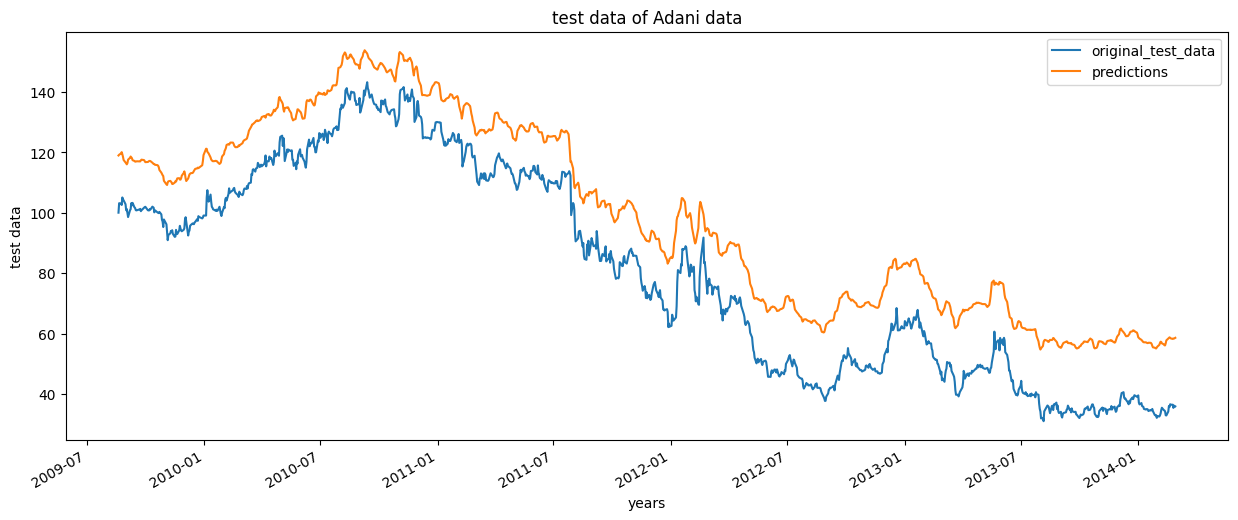

In [49]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

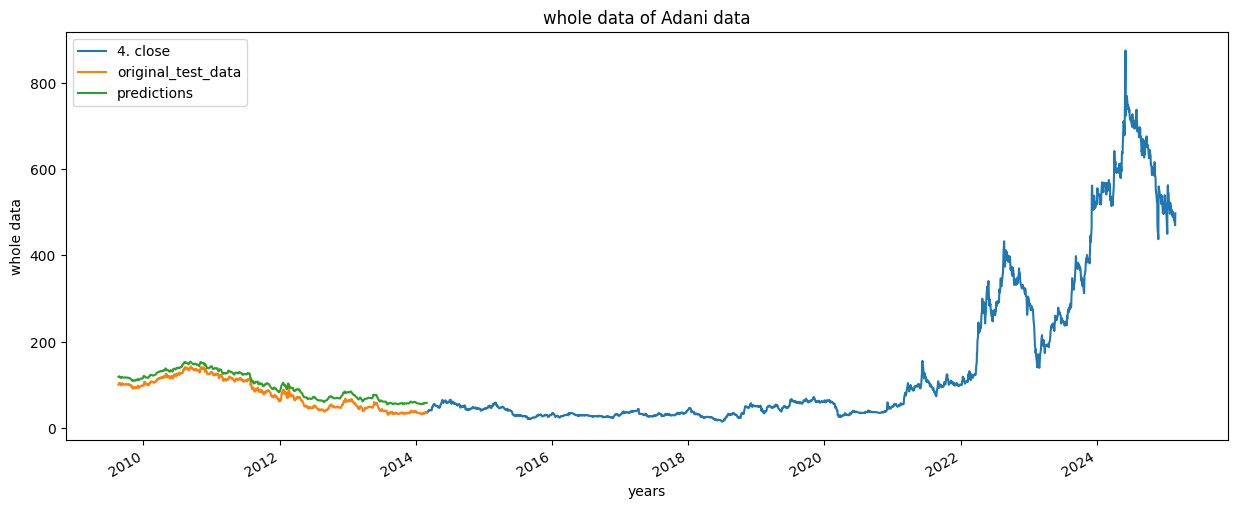

In [50]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [51]:
model.save("Latest_stock_price_model.keras")